# Implementing Machine Learning Models

In [2]:
#import the necessary libraries here
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statistics

In [3]:
#import the dataset
Diabetes = pd.read_csv('./Data/diabetes.csv') #final project dataset

Diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


There are many different models that we can do when solving a classification problem.

There's logistic regression, k-nearest neighbors, decision trees, and more. For our project, we will be starting with logistic regression.



### Logistic Regression



In [3]:
#first, we split up our feature and target variables
from sklearn.model_selection import train_test_split
X = Diabetes[['Glucose', 'BMI', 'Age']]
y = Diabetes[['Outcome']]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=42) #train_test_split

 #### REFER TO EXAMPLE NOTEBOOK IN THE FINAL PROJECT FOLDER FOR TRAIN TEST SPLIT !



In [6]:
#next, we perform a train test split using this data
# remember, the order is X_train, X_test, y_train, y_test
if X.shape[0] != y.shape[0]:
  print("It looks like you have missing data. You may want to preprocess your data more with pandas to delete any rows with missing, NaN, N/A, and null values.")
length= len(Diabetes.index)
idx = np.arange(length)
np.random.shuffle(idx)

split_threshold = int(length * 0.8)

train_idx = idx[:split_threshold]

test_idx = idx[split_threshold:]

# train_test_split(X, y, train_size = 0.8)
X = Diabetes[['Glucose', 'BMI', 'Age']]
y = Diabetes[['Outcome']]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=42)

NameError: name 'train_test_split' is not defined

In [0]:
corr = Diabetes.corr()
corr_rounded = np.round(corr, 2)

import plotly.express as px
fig = px.imshow(corr_rounded, text_auto = True)

fig.update_layout(
    width = 1000,
    height = 1000,
    title_text = 'Correlation Heatmap of Data'
)
fig.show()

In [5]:
#next, we will import our logisitic regression library
## link: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

#import the logistic regression method here

from sklearn.linear_model import LogisticRegression

#set a variable equal to the logistic regression object
lr = LogisticRegression()

#fit the model to the training data using .fit(X_train, y_train)
lr.fit(X_train, y_train)

#predict using the test set using .predict(X_test)
y_pred = lr.predict(X_test)

/projects/00955498-d90a-4f7c-a6db-dc898878bed5/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [6]:
#finally to evaluate our model, we will be using accuracy

#import accuracy method here
from sklearn.metrics import accuracy_score

#compute accuracy score
## accuracy_score(actual, predicted)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of test set: ', accuracy)

Accuracy of test set:  0.7467532467532467


In [0]:
Diabetes.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
Diabetes.columns

### k-Nearest Neighbors

In [4]:
#first, we split up our feature and target variables
X = Diabetes[['Glucose']].to_numpy() #REPLACE THIS CODE with feature variables
y = Diabetes[['Outcome']].to_numpy() #REPLACE THIS CODE with target variable

In [7]:
#next, we perform a train test split using this data
# remember, the order is X_train, X_test, y_train, y_test
length= len(Diabetes.index)
idx = np.arange(length)
np.random.shuffle(idx)
split_threshold = int(length * 0.8)

#import the appropriate train_test method here
train_idx = idx[:split_threshold]
test_idx = idx[split_threshold:]

#now set the 4 lists equal to the train test method
# train_test_split(X, y, train_size = 0.8)
x_train, y_train = X[train_idx], y[train_idx]
x_test, y_test = X[test_idx], y[test_idx]
x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

KeyError: "None of [Int64Index([ 76,  72, 546, 387, 343, 511, 716, 690, 764, 515,\n            ...\n            397, 272, 352,  90, 584, 473, 663, 404, 474,  29],\n           dtype='int64', length=614)] are in the [columns]"

NameError: name 'x_train' is not defined

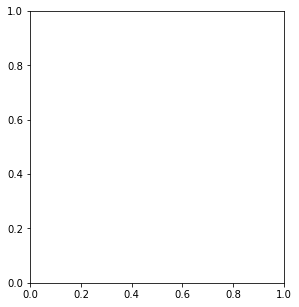

In [8]:
plt.figure(figsize=(10,5))

# plot the train set
plt.subplot(1,2,1)
plt.scatter(x_train,y_train, c='orange')
plt.xlabel('x', fontsize = 20)
plt.ylabel('y', fontsize = 20)
plt.title('Generated Data - Train')
plt.grid('on')

# plot the test set
plt.subplot(1,2,2)
plt.scatter(x_test, y_test)
plt.xlabel('x', fontsize = 20)
plt.ylabel('y', fontsize = 20)
plt.title('Generated Data - Test')
plt.grid('on')

plt.show()

In [10]:
#next, we will import our k-nn library
# link: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

#import the k-nn method here
from sklearn.neighbors import KNeighborsClassifier

#set a variable equal to the k-nn object
neigh = KNeighborsClassifier(n_neighbors=3)

#fit the model to the training data using .fit(X_train, y_train)
neigh.fit(X_train, y_train.values.ravel())

#predict using the test set using .predict(X_test)
print(neigh.predict(X_test))

[1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 1
 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0
 1 1 0 1 0 0]


In [0]:
#finally to evaluate our model, we will be using accuracy

#import accuracy method here
'''YOUR CODE GOES HERE'''

#compute accuracy score
## accuracy_score(actual, predicted)
'''YOUR CODE GOES HERE'''

In [0]:
import matplotlib.pyplot as plt
#let's plot our split data to see how it looks!
plt.figure(figsize=(10,5))

# plot the train set 
plt.subplot(1,2,1)
plt.scatter(x_train,y_train, c='orange')  
plt.xlabel('x', fontsize = 20) 
plt.ylabel('y', fontsize = 20)
plt.title('Generated Data - Train')
plt.grid('on')

# plot the test set 
plt.subplot(1,2,2)
plt.scatter(x_test, y_test)  
plt.xlabel('x', fontsize = 20) 
plt.ylabel('y', fontsize = 20)
plt.title('Generated Data - Test')
plt.grid('on')

plt.show()